<a href="https://colab.research.google.com/github/mahipal2qa/Machine-learning/blob/main/LinearRegressionOnRentalBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression with simple sklearn linear model and with Neural network

In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import tensorflow as tf
from sklearn.linear_model import LinearRegression

Markelle Kelly, Rachel Longjohn, Kolby Nottingham,
The UCI Machine Learning Repository,
[link to repository](https://archive.ics.uci.edu)

[Seoul rental bike dataset](https://https://colab.research.google.com/drive/1MrPMBg_PgiJIsw6635qlejuNyv5ialB-#scrollTo=pa25KUGdOB1l&line=3&uniqifier=1)


In [37]:
dataset_cols = ["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]
df = pd.read_csv("SeoulBikeData.csv", encoding="unicode_escape").drop(["Date","Holiday","Seasons"],axis=1)

In [38]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "No").astype(int)
df = df[df["hour"] == 12]
df = df.drop("hour",axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0


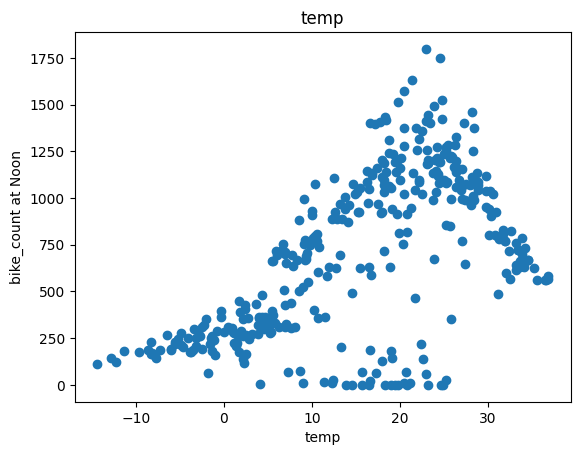

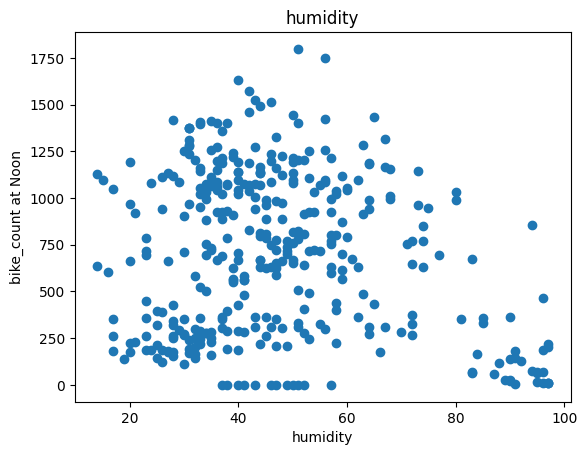

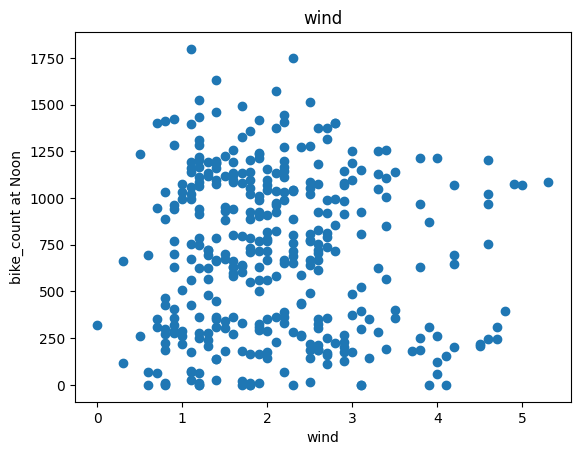

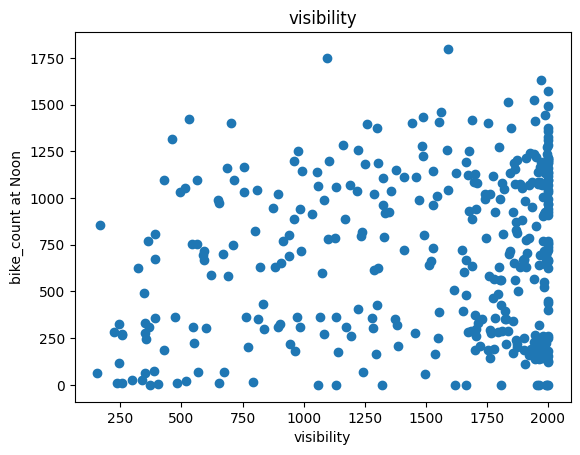

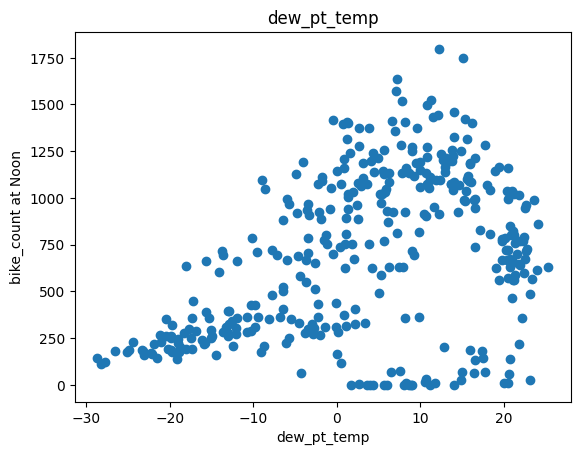

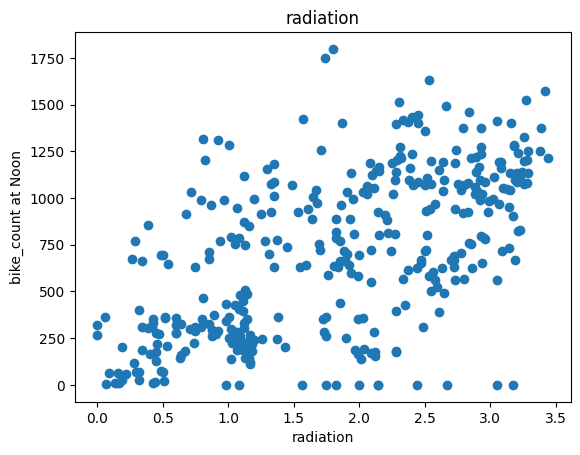

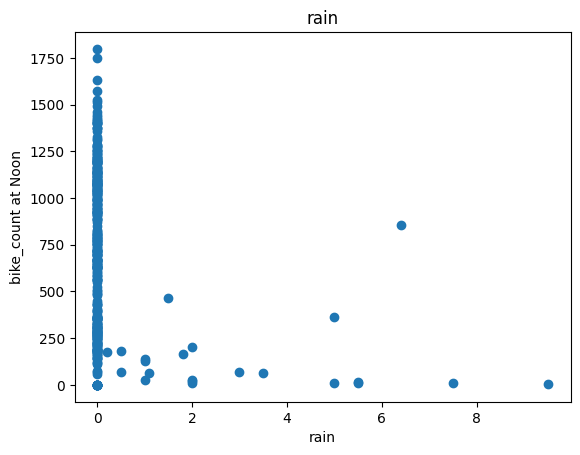

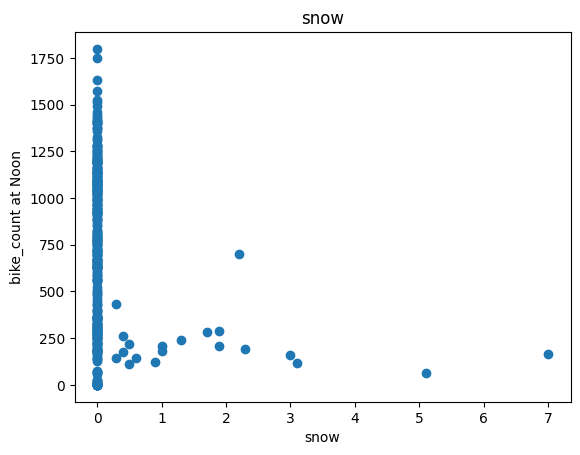

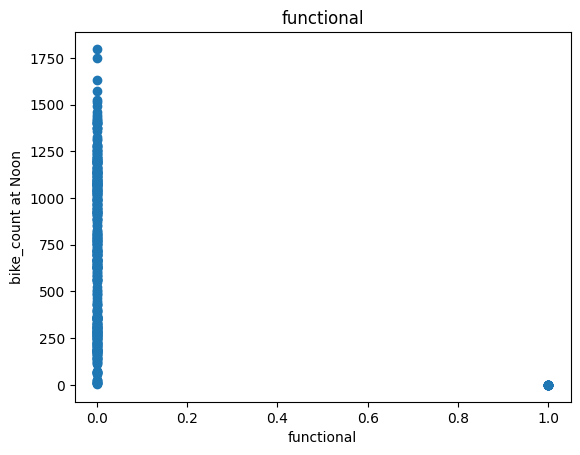

In [41]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("bike_count at Noon")
  plt.xlabel(label)
  plt.show()

In [43]:
df = df.drop(["wind","visibility","functional"],axis=1)

In [44]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


Train/valid/test dataset

In [45]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [97]:
def get_xy(dataframe, y_label, x_labels):
  dataframe = copy.deepcopy(dataframe)
  if x_labels.empty:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values
  Y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,Y))

  return data, X, Y

In [54]:
_, x_train_temp , y_train_temp = get_xy(train, "bike_count",x_labels=["temp"])
_, x_val_temp , y_val_temp = get_xy(val, "bike_count",x_labels=["temp"])
_, x_test_temp , y_test_temp = get_xy(test, "bike_count",x_labels=["temp"])

In [56]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

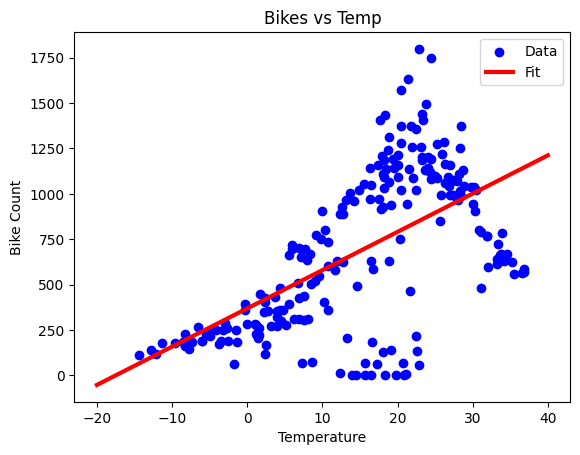

In [62]:
plt.scatter(x_train_temp,y_train_temp,label="Data" , color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

Multiple Linear Regression

In [122]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, x_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, x_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [123]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [124]:
temp_nn_model = tf.keras.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(1)
])

In [125]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                      loss=tf.keras.losses.MeanSquaredError())

In [126]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1),
    y_train_temp,
    epochs=1000,
    verbose=0,
    validation_data=(x_val_temp,y_val_temp)
)

In [127]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

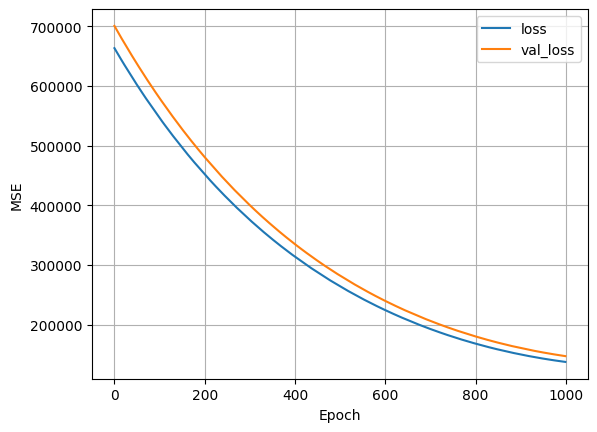

In [128]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


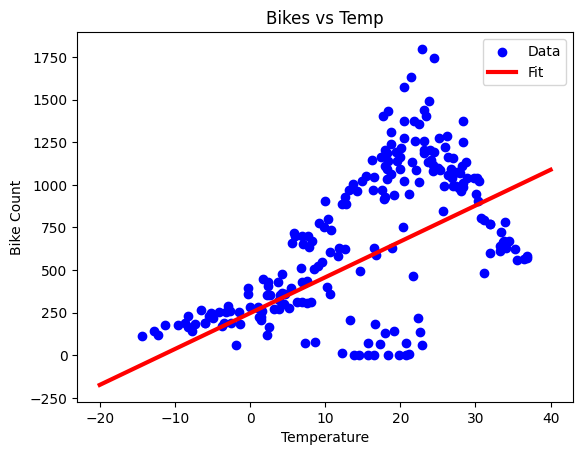

In [129]:
plt.scatter(x_train_temp,y_train_temp,label="Data" , color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

Neural Network

In [136]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss=tf.keras.losses.MeanSquaredError())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [137]:
history = nn_model.fit(
    x_train_temp,
    y_train_temp,
    epochs=100,
    verbose=0,
    validation_data=(x_val_temp,y_val_temp)
)

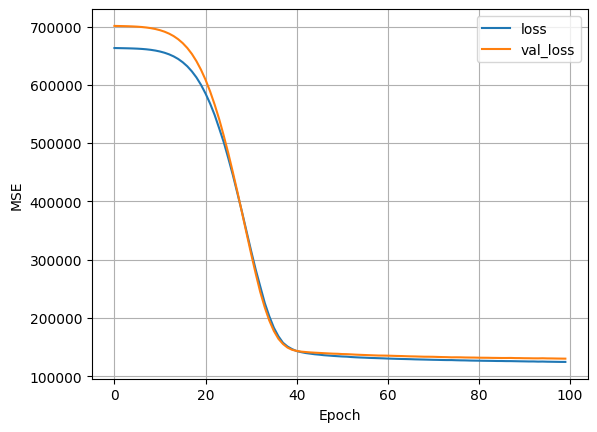

In [138]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


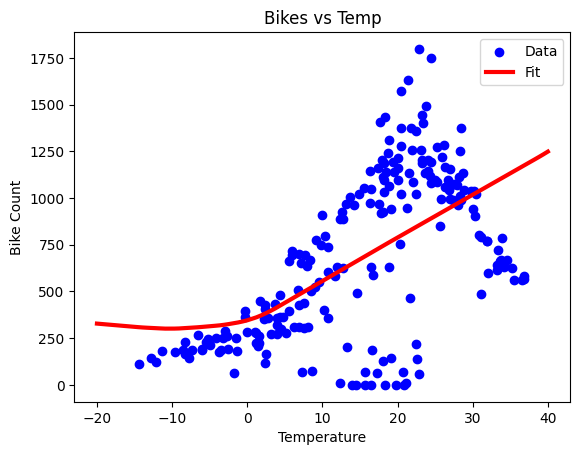

In [139]:
plt.scatter(x_train_temp,y_train_temp,label="Data" , color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

In [144]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [145]:
nn_model = tf.keras.Sequential([
  all_normalizer,
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss=tf.keras.losses.MeanSquaredError())


In [146]:
history = nn_model.fit(
    X_train_all,
    y_train_all,
    epochs=100,
    verbose=0,
    validation_data=(X_val_all,Y_val_all)
)

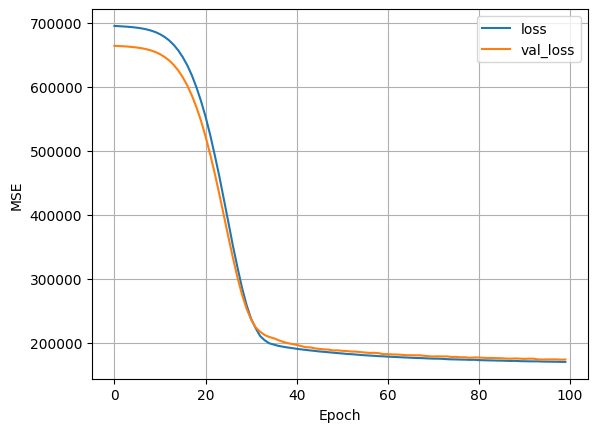

In [147]:
plot_loss(history)

In [150]:
all_reg = LinearRegression()
all_reg.fit(x_test_all,y_test_all)


LinearRegression()

In [151]:
all_reg.score(x_test_all,y_test_all)

0.3565609466717249

In [153]:
y_pred_lr = all_reg.predict(x_test_all)

In [154]:
# calculate the MSR for both linear reg and nn
y_pred_lr = all_reg.predict(x_test_all)
y_pred_nn = nn_model.predict(x_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [157]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [158]:
MSE(y_pred_lr,y_test_all)

128029.15244946019

In [159]:
MSE(y_pred_nn,y_test_all)

201002.96946255537

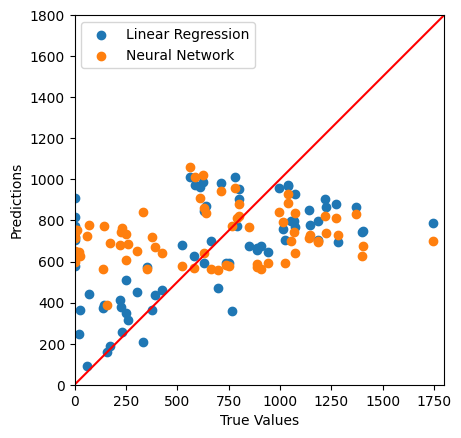

In [163]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Linear Regression")
plt.scatter(y_test_all, y_pred_nn, label="Neural Network")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c = "red")
